# Step By Step MOmentmatching for Gaussian Mixture
- Try to find out where the program breaks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sklearn
import gm_funcs
import os

#******Define testing connditions******
np.random.seed(42)  # Set seed for reproducibility
os.environ["LOKY_MAX_CPU_COUNT"] = "12"  # Limit the number of threads used by joblib, windows 11 stuff

# Define leaky ReLU function
def leaky_relu(x, a_in):
    return np.where(x > 0, x, a_in * x)

Parsed Mathematica expressions:
m[0] = w0*(-sqrt(2)*a*c0*exp(-mu0**2/(2*c0**2))/(2*sqrt(pi)) + a*mu0*erfc(sqrt(2)*mu0/(2*c0))/2 + sqrt(2)*c0*exp(-mu0**2/(2*c0**2))/(2*sqrt(pi)) + mu0*(erf(sqrt(2)*mu0/(2*c0)) + 1)/2) + w1*(-sqrt(2)*a*c1*exp(-mu1**2/(2*c1**2))/(2*sqrt(pi)) + a*mu1*erfc(sqrt(2)*mu1/(2*c1))/2 + sqrt(2)*c1*exp(-mu1**2/(2*c1**2))/(2*sqrt(pi)) + mu1*(erf(sqrt(2)*mu1/(2*c1)) + 1)/2)
m[1] = w0*(-sqrt(2)*a**2*c0*mu0*exp(-mu0**2/(2*c0**2))/(2*sqrt(pi)) + a**2*(c0**2 + mu0**2)*erfc(sqrt(2)*mu0/(2*c0))/2 + sqrt(2)*c0*mu0*exp(-mu0**2/(2*c0**2))/(2*sqrt(pi)) + (c0**2 + mu0**2)*(erf(sqrt(2)*mu0/(2*c0)) + 1)/2) + w1*(-sqrt(2)*a**2*c1*mu1*exp(-mu1**2/(2*c1**2))/(2*sqrt(pi)) + a**2*(c1**2 + mu1**2)*erfc(sqrt(2)*mu1/(2*c1))/2 + sqrt(2)*c1*mu1*exp(-mu1**2/(2*c1**2))/(2*sqrt(pi)) + (c1**2 + mu1**2)*(erf(sqrt(2)*mu1/(2*c1)) + 1)/2)
m[2] = w0*(-sqrt(2)*a**3*c0*(2*c0**2 + mu0**2)*exp(-mu0**2/(2*c0**2))/(2*sqrt(pi)) + a**3*mu0*(3*c0**2 + mu0**2)*erfc(sqrt(2)*mu0/(2*c0))/2 + sqrt(2)*c0*(2*c0**2 

## First Step: Define a GM, Compute its Moments in differtent ways

*****Moment Comparison*****
Order 1, Samples: 4.0001, Analytic : 4.0000, Pseudo Analytic: 4.0000
Rel. Error: 0.00%, Pseudo Rel. Error: 0.00%
Order 2, Samples: 20.9914, Analytic : 21.0000, Pseudo Analytic: 21.0000
Rel. Error: 0.04%, Pseudo Rel. Error: 0.04%
Order 3, Samples: 114.3113, Analytic : 114.4000, Pseudo Analytic: 114.4000
Rel. Error: 0.08%, Pseudo Rel. Error: 0.08%
Order 4, Samples: 646.7567, Analytic : 647.4800, Pseudo Analytic: 647.4800
Rel. Error: 0.11%, Pseudo Rel. Error: 0.11%
Order 5, Samples: 3780.9093, Analytic : 3786.4000, Pseudo Analytic: 3786.4000
Rel. Error: 0.15%, Pseudo Rel. Error: 0.15%
Order 6, Samples: 22775.8535, Analytic : 21316.7600, Pseudo Analytic: 22816.7600
Rel. Error: 6.41%, Pseudo Rel. Error: 0.18%
Order 7, Samples: 141039.9067, Analytic : 141345.7600, Pseudo Analytic: 141345.7600
Rel. Error: 0.22%, Pseudo Rel. Error: 0.22%
Order 8, Samples: 896067.9555, Analytic : 898389.4160, Pseudo Analytic: 898389.4160
Rel. Error: 0.26%, Pseudo Rel. Error: 0.26%
Or

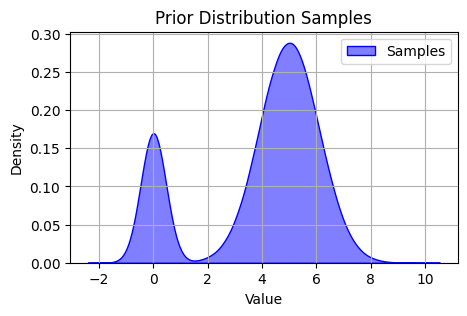

In [2]:
# Parameters for the prior Gaussian Mixture with two components
# c is the variance of the Gaussians, mu are the means of the GM, w are the weights of the GLM
c0_test = 0.2
c1_test = 1.2
mu0_test = 0.0
mu1_test = 5.0
w0_test = 0.2
w1_test = 0.8

# Sample from the Distribution and compare the empirical moments with the analytical ones
num_samples = 1000000
gm = sklearn.mixture.GaussianMixture(n_components=2, covariance_type='full')
gm.means_ = np.array([[mu0_test], [mu1_test]])
gm.covariances_ = np.array([[[c0_test]], [[c1_test]]])
gm.weights_ = np.array([w0_test, w1_test])
samples_prior  = gm.sample(num_samples)[0]

# Compute the prior moments empirically
moments_samples_prior = []
for i in range(1, 11):
    moment = np.mean(samples_prior ** i)
    moments_samples_prior.append(moment)

# Compute the first moments analytically
moments_analytic_prior = []
moments_analytic_prior.append(gm_funcs.e1_gm(w0_test, w1_test, mu0_test, mu1_test, c0_test, c1_test))
moments_analytic_prior.append(gm_funcs.e2_gm(w0_test, w1_test, mu0_test, mu1_test, c0_test, c1_test))
moments_analytic_prior.append(gm_funcs.e3_gm(w0_test, w1_test, mu0_test, mu1_test, c0_test, c1_test))
moments_analytic_prior.append(gm_funcs.e4_gm(w0_test, w1_test, mu0_test, mu1_test, c0_test, c1_test))
moments_analytic_prior.append(gm_funcs.e5_gm(w0_test, w1_test, mu0_test, mu1_test, c0_test, c1_test))
moments_analytic_prior.append(gm_funcs.e6_gm(w0_test, w1_test, mu0_test, mu1_test, c0_test, c1_test))
moments_analytic_prior.append(gm_funcs.e7_gm(w0_test, w1_test, mu0_test, mu1_test, c0_test, c1_test))
moments_analytic_prior.append(gm_funcs.e8_gm(w0_test, w1_test, mu0_test, mu1_test, c0_test, c1_test))
moments_analytic_prior.append(gm_funcs.e9_gm(w0_test, w1_test, mu0_test, mu1_test, c0_test, c1_test))
moments_analytic_prior.append(gm_funcs.e10_gm(w0_test, w1_test, mu0_test, mu1_test, c0_test, c1_test))

# Check with analytics Computation through linear relu
# Compute the first moments analytically
moments_analytic_prior_leaky = gm_funcs.compute_moments_analytic(1.0,c0_test,c1_test,mu0_test,mu1_test,w0_test,w1_test)
#moments_analytic_prior_leaky = gm_funcs.compute_moments_analytic(1.0,np.sqrt(c0_test),np.sqrt(c1_test),mu0_test,mu1_test,w0_test,w1_test)

print("*****Moment Comparison*****")
for i in range(1, 11):
    print(f"Order {i}, Samples: {moments_samples_prior[i-1]:.4f}, Analytic : {moments_analytic_prior[i-1]:.4f}, Pseudo Analytic: {moments_analytic_prior_leaky[i-1]:.4f}")
    print(f"Rel. Error: {abs(moments_samples_prior[i-1] - moments_analytic_prior[i-1])/abs(moments_samples_prior[i-1]) * 100:.2f}%, Pseudo Rel. Error: {abs(moments_samples_prior[i-1] - moments_analytic_prior_leaky[i-1])/abs(moments_samples_prior[i-1]) * 100:.2f}%")

plt.figure(figsize=(5, 3))
sns.kdeplot(samples_prior.squeeze(), color='blue', label='Samples', fill=True, alpha=0.5)
plt.title('Prior Distribution Samples')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()


## Propagate samples through leaky relu 

Optimization Time: 0.2771332263946533 seconds
Optimized parameters Moment-based:
w0: 0.6688794475226345
mu0: 5.2145335539015
mu1: 1.5725380454360727
c0: 0.9973128510454871
c1: 4.341416139864031
Residuals: [ 2.14849725e-03  5.29410443e-03 -9.21762437e-03 -3.83467765e-05
 -8.88339280e-04  4.05184601e-04  2.65312427e-03  3.17784075e-03
 -2.84322320e-04 -2.46028353e-03]
EM Optimization Time: 1.4254918098449707 seconds
Optimized parameters EM-based:
w0: 0.800399371250271
mu0: 4.997541165515998
mu1: 0.00044796096284601745
c0: 1.2008265482844833
c1: 0.19999711748409935


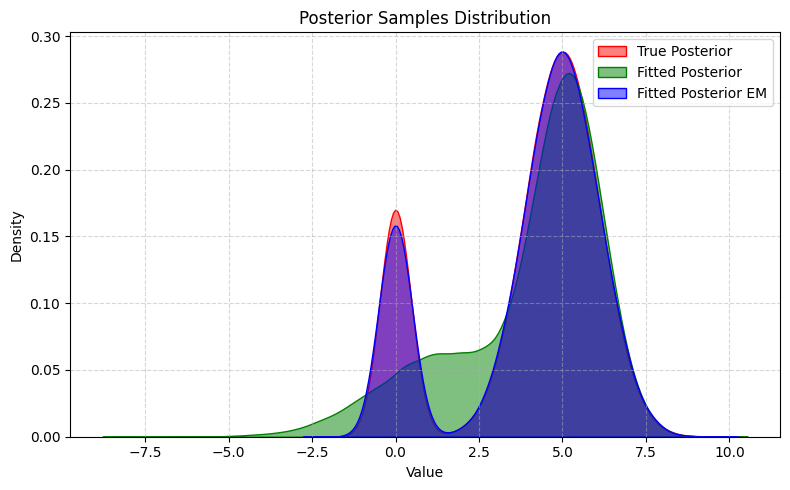

In [3]:
# Compute the propagated samples
a_test = 1.0
samples_post = leaky_relu(samples_prior, a_test)  # Apply leaky ReLU to the samples

# Compute the moments of the samples after applying leaky ReLU
moments_analytic_post = gm_funcs.compute_moments_analytic(a_test, c0_test, c1_test, mu0_test, mu1_test, w0_test, w1_test)

# Perform the fit
# Initial guess for x, mu, c
mu00 = 4.98
mu11 = 0.15
w00 = 0.8
w11 = 0.2
c0 = 1.23
c1 = 0.06
params0 = [w00, mu00, mu11, c0, c1]
args = tuple(moments_analytic_post)

# Call moment based optimizer 
start = time.time()
result = gm_funcs.fit_gm_moments(params0, args)
end = time.time()
print("Optimization Time:", end - start, "seconds")

print("Optimized parameters Moment-based:")
print("w0:", result.x[0])
print("mu0:", result.x[1])
print("mu1:", result.x[2])
print("c0:", result.x[3])
print("c1:", result.x[4])
print("Residuals:", result.fun)

# Generate GM Samples with optimized parameters
gm = sklearn.mixture.GaussianMixture(n_components=2, covariance_type='full')
gm.means_ = np.array([[result.x[1]], [result.x[2]]])
gm.covariances_ = np.array([[[result.x[3]]], [[result.x[4]]]])
gm.weights_ = np.array([result.x[0], 1 - result.x[0]])
samples_post_fitted  = gm.sample(100000)[0]

# Call EM based optimizer on samples
start = time.time()
gm = sklearn.mixture.GaussianMixture(n_components=2, covariance_type='full')
gm.fit(samples_post)
end = time.time()
print("EM Optimization Time:", end - start, "seconds")
samples_post_fitted_EM = gm.sample(100000)[0]
# Extract parameters from the EM-fitted Gaussian Mixture Model
em_weights = gm.weights_
em_means = gm.means_.flatten()
em_covariances = gm.covariances_.flatten()
print("Optimized parameters EM-based:")
print("w0:", em_weights[0])
print("mu0:", em_means[0])
print("mu1:", em_means[1])
print("c0:", em_covariances[0])
print("c1:", em_covariances[1])

# Plot posterior samples as a KDE with filled areas and different colors
plt.figure(figsize=(8, 5))
sns.kdeplot(samples_post.squeeze(), color='red', label='True Posterior', fill=True, alpha=0.5)
sns.kdeplot(samples_post_fitted.squeeze(), color='green', label='Fitted Posterior', fill=True, alpha=0.5)
sns.kdeplot(samples_post_fitted_EM.squeeze(), color='blue', label='Fitted Posterior EM', fill=True, alpha=0.5)
plt.title('Posterior Samples Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.savefig('workbench/momentmatching_postReLU.png', dpi=300)


## Approximate arbitrary GM based on Moments

Optimization Time: 0.002515077590942383 seconds
Optimized Weights: 0.7999999353887818 0.20000006461121822
Optimized Means: 5.0000001016662905 1.2107374448383254e-06
Optimized Covariances: 1.1999999355609219 0.020009161612190823


Text(0, 0.5, 'Density')

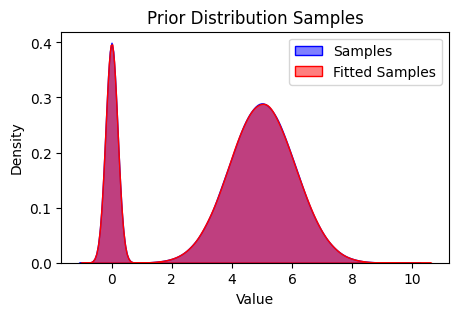

In [4]:
# Parameters for the prior Gaussian Mixture with two components
# c is the variance of the Gaussians, mu are the means of the GM, w are the weights of the GLM
c0_test = 0.02
c1_test = 1.2
mu0_test = 0.0
mu1_test = 5.0
w0_test = 0.2
w1_test = 0.8

# Sample from the Distribution and compare the empirical moments with the analytical ones
num_samples = 1000000
gm = sklearn.mixture.GaussianMixture(n_components=2, covariance_type='full')
gm.means_ = np.array([[mu0_test], [mu1_test]])
gm.covariances_ = np.array([[[c0_test]], [[c1_test]]])
gm.weights_ = np.array([w0_test, w1_test])
samples_prior  = gm.sample(num_samples)[0]

# Compute the first moments analytically
moments_analytic_test = []
moments_analytic_test.append(gm_funcs.e1_gm(w0_test, w1_test, mu0_test, mu1_test, c0_test, c1_test))
moments_analytic_test.append(gm_funcs.e2_gm(w0_test, w1_test, mu0_test, mu1_test, c0_test, c1_test))
moments_analytic_test.append(gm_funcs.e3_gm(w0_test, w1_test, mu0_test, mu1_test, c0_test, c1_test))
moments_analytic_test.append(gm_funcs.e4_gm(w0_test, w1_test, mu0_test, mu1_test, c0_test, c1_test))
moments_analytic_test.append(gm_funcs.e5_gm(w0_test, w1_test, mu0_test, mu1_test, c0_test, c1_test))
moments_analytic_test.append(gm_funcs.e6_gm(w0_test, w1_test, mu0_test, mu1_test, c0_test, c1_test))
moments_analytic_test.append(gm_funcs.e7_gm(w0_test, w1_test, mu0_test, mu1_test, c0_test, c1_test))
moments_analytic_test.append(gm_funcs.e8_gm(w0_test, w1_test, mu0_test, mu1_test, c0_test, c1_test))
moments_analytic_test.append(gm_funcs.e9_gm(w0_test, w1_test, mu0_test, mu1_test, c0_test, c1_test))
moments_analytic_test.append(gm_funcs.e10_gm(w0_test, w1_test, mu0_test, mu1_test, c0_test, c1_test))


# Perform the fit
# Initial guess for x, mu, c
mu00 = 4.98
mu11 = 0.15
w00 = 0.8
w11 = 0.2
c0 = 1.23
c1 = 0.06
params0 = [w00, mu00, mu11, c0, c1]
args = tuple(moments_analytic_test)

# Call moment based optimizer 
start = time.time()
result = gm_funcs.fit_gm_moments(params0, args)
end = time.time()
print("Optimization Time:", end - start, "seconds")

print("Optimized Weights:", result.x[0], 1-result.x[0])
print("Optimized Means:", result.x[1], result.x[2])
print("Optimized Covariances:", result.x[3], result.x[4])

# Sample from a GM model
gm = sklearn.mixture.GaussianMixture(n_components=2, covariance_type='full')
gm.means_ = np.array([[result.x[1]], [result.x[2]]])
gm.covariances_ = np.array([[[result.x[3]]], [[result.x[4]]]])
gm.weights_ = np.array([result.x[0], 1 - result.x[0]])
samples_prior_fitted  = gm.sample(num_samples)[0]

plt.figure(figsize=(5, 3))
sns.kdeplot(samples_prior.squeeze(), color='blue', label='Samples', fill=True, alpha=0.5)
sns.kdeplot(samples_prior_fitted.squeeze(), color='red', label='Fitted Samples', fill=True, alpha=0.5)
plt.title('Prior Distribution Samples')
plt.xlabel('Value')
plt.legend()
plt.ylabel('Density')